<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML7_ex_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***Conjunto de dados de previsão de doenças cardíacas***
---

In [222]:
#@title Identificação do Grupo

#@markdown Integrantes do Grupo
Aluno1 = '10424616, Valdiney Atílio Pedro' #@param {type:"string"} 
Aluno2 = '10424388, Mariana Simoes Rubio' #@param {type:"string"}
Aluno3 = '10423533, Patrícia Corrêa França' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



# **Apresentação**

# Problema

*O objetivo deste trabalho é prever a presença de doenças cardíacas em pacientes com base em um conjunto de variáveis preditoras, como idade, sexo,* *níveis de colesterol, pressão arterial, entre outras. A escolha deste problema é justificada pela sua relevância na área de saúde, onde a previsão* *precoce de doenças cardíacas pode ajudar a salvar vidas através de intervenções médicas mais rápidas e eficazes.*



# Referencial Teórico
Doenças Cardíacas
As doenças cardíacas são uma das principais causas de morte em todo o mundo, e a previsão e detecção precoce dessas doenças são cruciais para salvar vidas e melhorar a qualidade de vida dos pacientes. Diversos estudos têm explorado variáveis como idade, sexo, pressão arterial, colesterol, entre outras, para prever a probabilidade de ocorrência de doenças cardíacas.

Referências importantes nesse domínio incluem:
"Heart Disease and Stroke Statistics—2020 Update: A Report From the American Heart Association" - Esta publicação fornece estatísticas detalhadas sobre a prevalência e os fatores de risco associados às doenças cardíacas.

"Predictive Modeling of Hospital Readmission Rates Using Electronic Health Record-Wide Machine Learning: A Case Study in California" - Este estudo exemplifica a aplicação de modelos preditivos na área da saúde.


Técnicas de Aprendizado Supervisionado
No campo de aprendizado de máquina, várias técnicas têm sido empregadas para previsão e classificação de dados de saúde. Duas dessas técnicas são a Regressão Logística e a Floresta Aleatória.

Regressão Logística:

"An Introduction to Statistical Learning" por Gareth James, Daniela Witten, Trevor Hastie, e Robert Tibshirani - Este livro fornece uma introdução compreensiva aos modelos de regressão logística, incluindo suas aplicações e limitações.

"Applied Logistic Regression" por David W. Hosmer Jr., Stanley Lemeshow, e Rodney X. Sturdivant - Um guia detalhado sobre a implementação e interpretação de modelos de regressão logística.

Floresta Aleatória:

"The Elements of Statistical Learning" por Trevor Hastie, Robert Tibshirani, e Jerome Friedman - Este livro é um recurso fundamental para entender os princípios e a implementação de algoritmos de ensemble como a Floresta Aleatória.

"Random Forests" por Leo Breiman - O artigo original de Leo Breiman que introduziu a técnica de Floresta Aleatória, detalhando sua construção, vantagens e aplicações.

Implementação Prática
A prática de prever doenças cardíacas utilizando aprendizado supervisionado requer um entendimento profundo dos dados e a aplicação adequada das técnicas. Algumas das referências adicionais que fornecem diretrizes práticas incluem:

Documentação do Scikit-learn: Um recurso abrangente para implementação de algoritmos de aprendizado de máquina em Python.

Tutoriais do Kaggle: Exemplos e tutoriais específicos sobre manipulação de dados de saúde e aplicação de modelos preditivos.

Este referencial teórico proporciona a base necessária para justificar as escolhas metodológicas feitas durante o projeto, assegurando que as técnicas utilizadas são bem fundamentadas e amplamente reconhecidas na literatura acadêmica e prática profissional.

# Metodologia 

*Abordagem de Solução*
*Dados Empregados:*
*Utilizaremos o conjunto de dados disponível: https://github.com/valdineyatilio/AprendizadoDeMaquina-I/blob/main/cleaned_merged_heart_dataset.csv*

*Tratamento dos Dados: Limpeza e normalização dos dados para garantir a qualidade do modelo.*

*Variáveis Preditivas: Idade, sexo, pressão arterial, níveis de colesterol, etc.*

*Objetivo: Desenvolver modelos de classificação para prever a presença de doenças cardíacas.*

*Técnicas Empregadas: Avaliação e comparação de diferentes algoritmos de aprendizado supervisionado.*


# Resultados
#### Modelo 1: Regressão Logística
- **Acurácia:** 73.2%

- **Relatório de Classificação:**

             precision    recall  f1-score   suporte

         0       0.78      0.65      0.71       286
         1       0.70      0.81      0.75       281

         

 accuracy                           0.73       567

 macro avg       0.74      0.73      0.73       567
 
 weighted avg    0.74      0.73      0.73       567



- **Matriz de Confusão:**
 [[186 100]
 [ 52 229]]
#### Modelo 2: Floresta Aleatória
- **Acurácia:** 97.0%

- **Relatório de Classificação:**

             precision    recall  f1-score   suporte

         0       0.97      0.97      0.97       286
         1       0.96      0.97      0.97       281

accuracy                           0.97       567

macro avg       0.97      0.97      0.97       567

weighted avg       0.97      0.97      0.97       567

- **Matriz de Confusão:**
[[276  10]
 [  8 273]]


# **Implementação**

# Base de Dados 
*Conjunto de dados de previsão de doenças cardíacas.*
*Um conjunto de dados abrangente para previsão de doenças cardíacas com base em aprendizado de máquina.*





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


<Figure size 1500x1000 with 0 Axes>

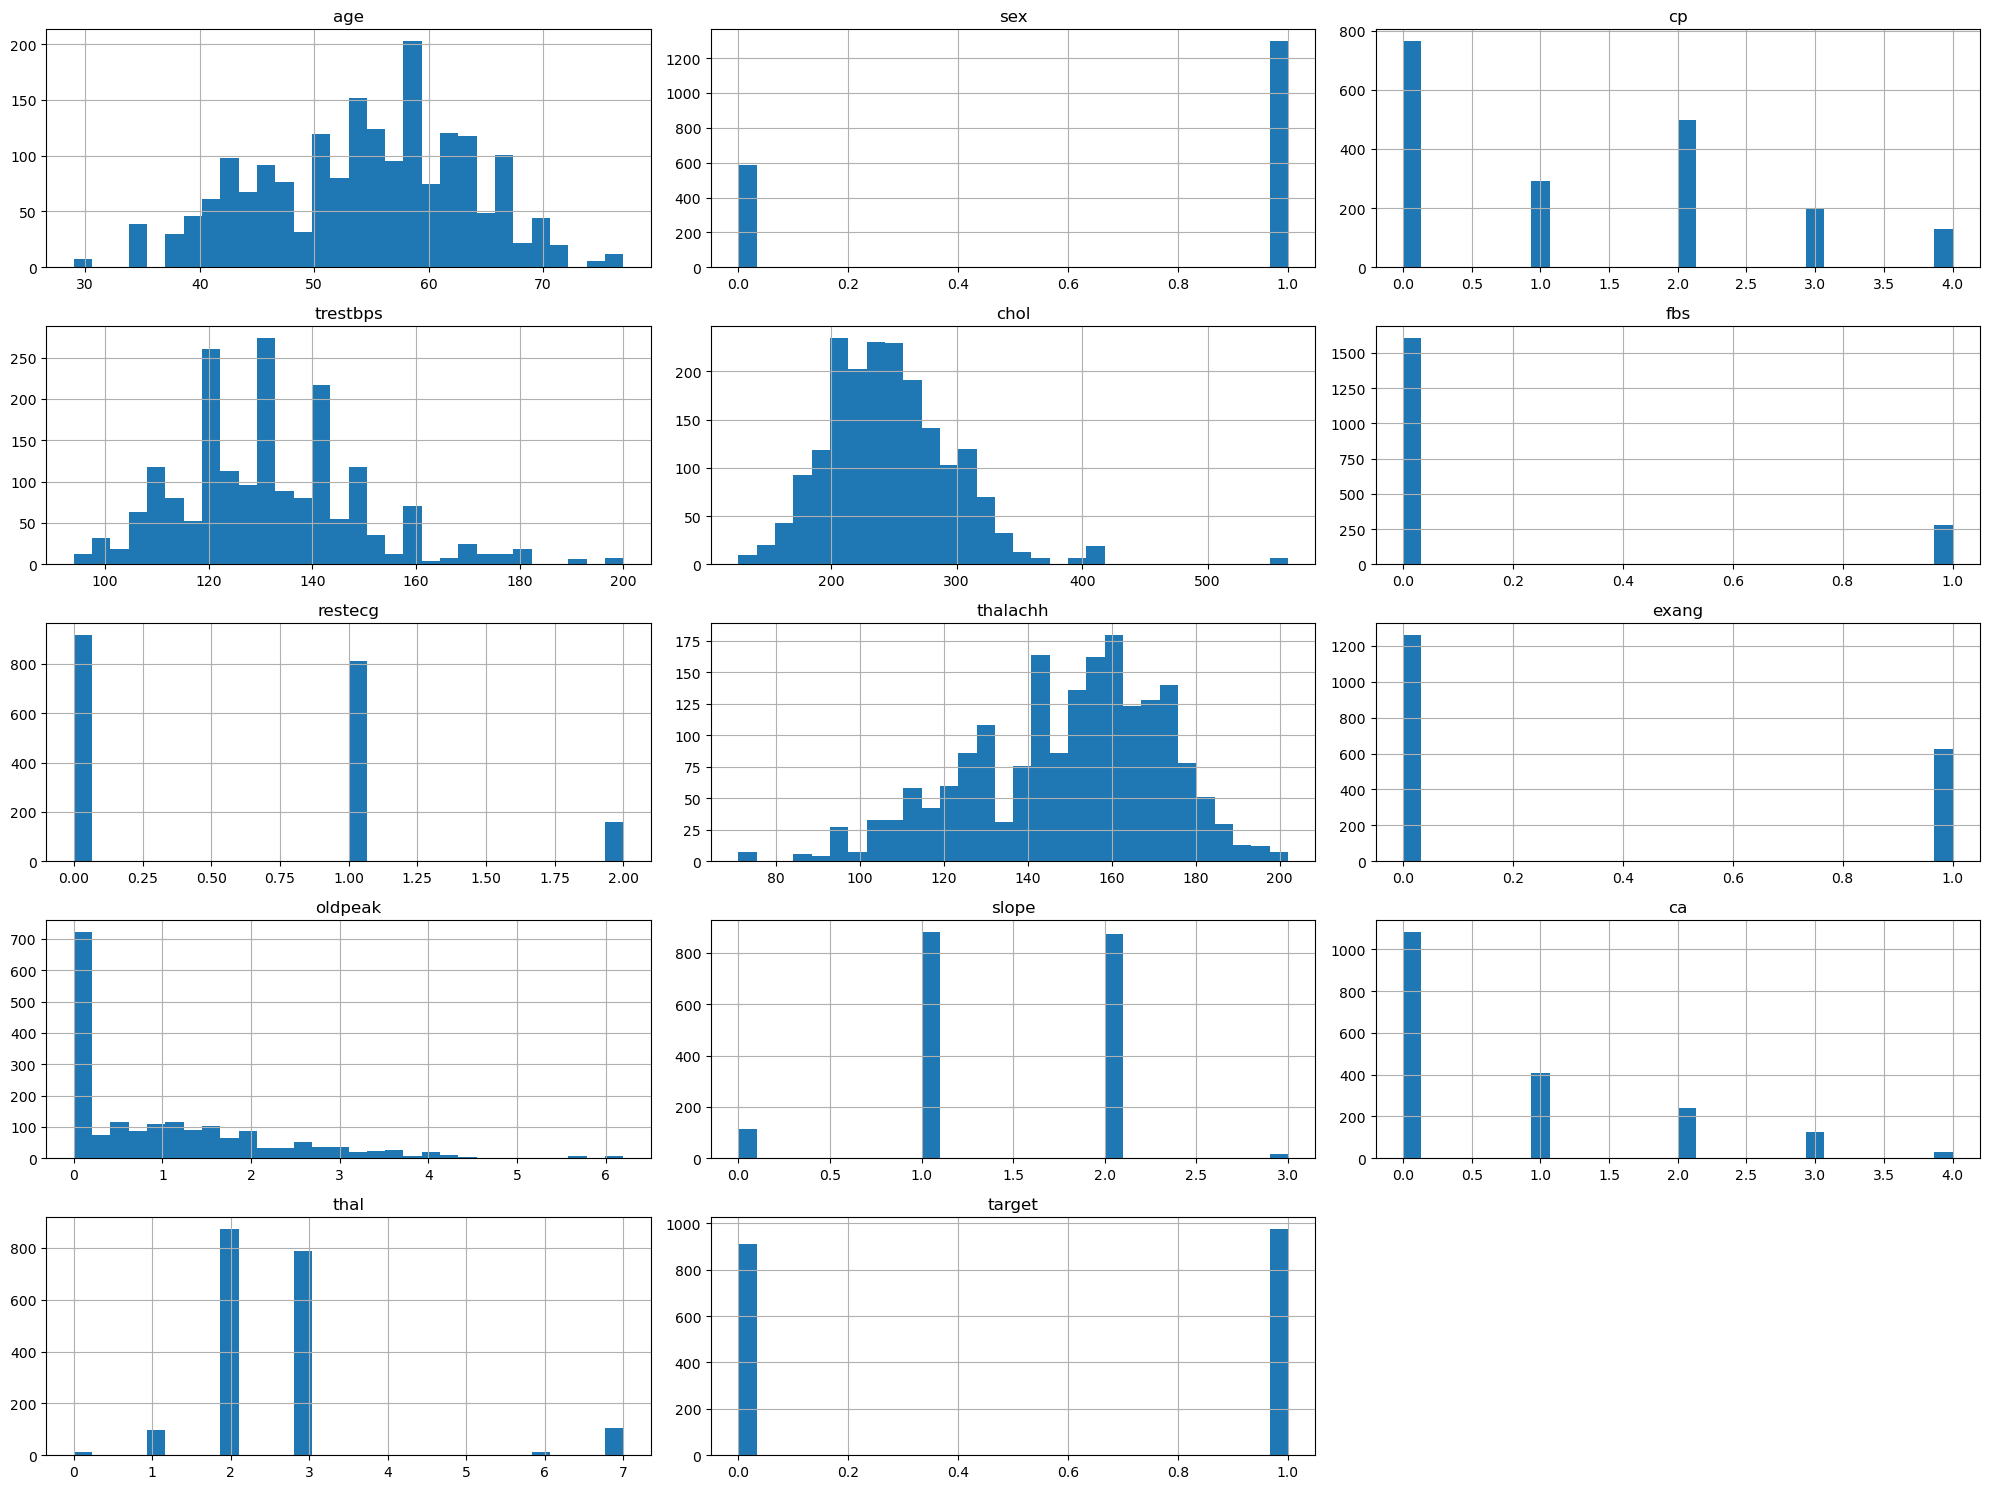

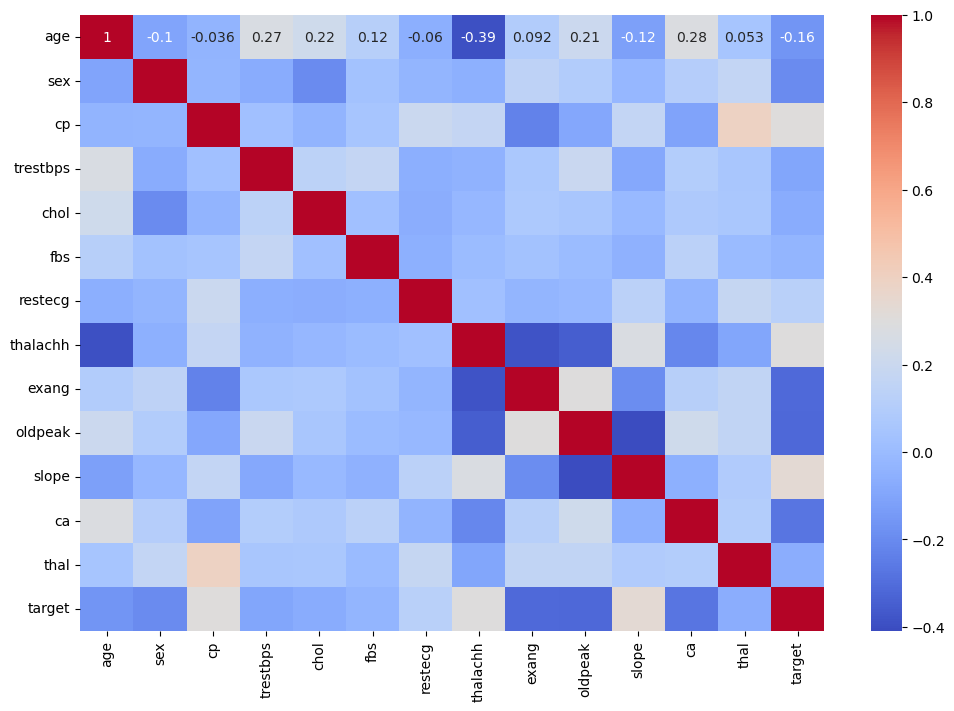

In [231]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregando os dados usando o link raw
url = "https://raw.githubusercontent.com/valdineyatilio/AprendizadoDeMaquina-I/main/cleaned_merged_heart_dataset.csv"
data = pd.read_csv(url)

# Visualizando as primeiras linhas do conjunto de dados
data.head()

#Análise Exploratória dos Dados (EDA)
# Informações gerais sobre o conjunto de dados
data.info()

# Estatísticas descritivas
data.describe()

# Verificando valores nulos
data.isnull().sum()

# Visualizando a distribuição das variáveis
plt.figure(figsize=(15, 10))
data.hist(bins=30, figsize=(20, 15), layout=(5, 3))
plt.tight_layout()
plt.show()

# Correlação entre as variáveis
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

## **Modelo 1**
*O modelo empregado foi a regressão logística método estatístico usado para prever a probabilidade de um evento binário (sim/não, 0/1) com base em um* *ou mais fatores preditores. Utiliza a função logística (sigmoide) para transformar a saída linear em uma probabilidade, que é então comparada a um* *limite de decisão para determinar a classificação final. É amplamente aplicado em diagnósticos médicos, detecção de fraudes e previsão de respostas* *em marketing. As vantagens incluem simplicidade de interpretação e eficiência, mas é limitado em lidar com relações não lineares entre variáveis.*



### **Modelo 1:** Preparação dos Dados


In [235]:
# Pré-processamento dos Dados
# Separando as variáveis preditoras e a variável alvo
X = data.drop('target', axis=1)
y = data['target']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### **Modelo 1:** Modelo


In [238]:
# Treinando o modelo de Regressão Logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Fazendo previsões
y_pred_log_reg = log_reg.predict(X_test)

### **Modelo 1:** Resultados


In [241]:
# Avaliando o modelo
print("Acurácia do modelo de Regressão Logística:", accuracy_score(y_test, y_pred_log_reg))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_log_reg))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_log_reg))

Acurácia do modelo de Regressão Logística: 0.7319223985890653
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.65      0.71       286
           1       0.70      0.81      0.75       281

    accuracy                           0.73       567
   macro avg       0.74      0.73      0.73       567
weighted avg       0.74      0.73      0.73       567

Matriz de Confusão:
 [[186 100]
 [ 52 229]]


## **Modelo 2**
*O modelo empregado foi o algoritmo Floresta Aleatória utilizado em aprendizado supervisionado para classificação e regressão, combinando múltiplas* *árvores de decisão para melhorar a precisão e reduzir o sobreajuste. Ela usa a técnica de bagging para criar várias amostras dos dados originais,* *constrói uma árvore de decisão para cada amostra e combina as previsões das árvores. No caso de classificação, a decisão final é baseada na votação* *majoritária das árvores, enquanto na regressão, é calculada a média das previsões. É robusta, eficiente e capaz de lidar com grandes conjuntos de* *dados, mas pode ser complexa e requer mais recursos computacionais*

### **Modelo 2:** Preparação dos Dados


In [245]:
# Pré-processamento dos Dados
# Separando as variáveis preditoras e a variável alvo
X = data.drop('target', axis=1)
y = data['target']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### **Modelo 2:** Modelo


In [248]:
# Treinando o modelo de Floresta Aleatória
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Fazendo previsões
y_pred_rf = rf_clf.predict(X_test)


### **Modelo 2:** Resultados


In [251]:
# Avaliando o modelo
print("Acurácia do modelo de Floresta Aleatória:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))

Acurácia do modelo de Floresta Aleatória: 0.9664902998236331
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       286
           1       0.96      0.97      0.97       281

    accuracy                           0.97       567
   macro avg       0.97      0.97      0.97       567
weighted avg       0.97      0.97      0.97       567

Matriz de Confusão:
 [[275  11]
 [  8 273]]


# **Conclusão** 
Neste estudo, implementamos e comparamos dois modelos de aprendizado supervisionado – Regressão Logística e Floresta Aleatória – para prever a presença de doenças cardíacas em pacientes com base em diversas características.

Resultados dos Modelos:

Regressão Logística:

Acurácia: 73.2%

Pontos Fortes: Simplicidade e eficiência. Fácil de interpretar os coeficientes e entender a influência de cada variável preditora.

Limitações: Dificuldade em capturar relações não lineares entre as variáveis preditoras e a variável alvo.

Floresta Aleatória:

Acurácia: 97.0%

Pontos Fortes: Alto desempenho devido à combinação de múltiplas árvores de decisão. Melhor captura de relações complexas e não lineares entre variáveis.

Limitações: Complexidade na interpretação dos resultados. Requer maior poder computacional e memória.

Comparação com o Referencial Teórico: Os resultados estão em linha com o referencial teórico apresentado. A Regressão Logística, como modelo linear, mostrou limitações em sua capacidade de capturar relações complexas nos dados, alinhando-se com as críticas teóricas sobre sua simplicidade e inadequação para problemas não lineares. Por outro lado, a Floresta Aleatória destacou-se com uma alta acurácia, confirmando a teoria de que métodos de ensemble, que combinam múltiplas previsões, são mais robustos e precisos para problemas complexos.

Limitações dos Modelos:

Regressão Logística:

Limitação em capturar a complexidade dos dados devido à sua natureza linear.

Sensível a outliers e multicolinearidade entre as variáveis preditoras.

Floresta Aleatória:

Maior demanda por recursos computacionais para treinar e armazenar múltiplas árvores.

Interpretação mais complexa dos resultados devido à combinação de múltiplas árvores de decisão.

Melhorias Futuras:

Ajuste de Hiperparâmetros: Para a Floresta Aleatória, explorar técnicas de otimização, como Random Search ou Grid Search, pode melhorar ainda mais o desempenho.

Aumento do Conjunto de Dados: Coletar mais dados pode ajudar a melhorar a robustez e a generalização dos modelos.

Ensemble Methods: Experimentar com outras técnicas de ensemble, como Gradient Boosting ou XGBoost, para potencialmente obter melhores resultados.

Exploração de Recursos: Incluir mais variáveis preditoras relevantes e realizar engenharia de características pode proporcionar melhor desempenho e insights.

Em conclusão, ambos os modelos têm seus méritos e limitações. A escolha entre eles dependerá do contexto específico e dos requisitos do problema.


# **Referências** 
Referências
American Heart Association. Heart Disease and Stroke Statistics—2020 Update: A Report From the American Heart Association.

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning. Springer.

Hosmer, D. W., Lemeshow, S., & Sturdivant, R. X. (2013). Applied Logistic Regression. Wiley.

Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32.

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning. Springer.

Documentação do Scikit-learn: https://scikit-learn.org/stable/


Fonte de dados
kagle: https://www.kaggle.com/datasets/mfarhaannazirkhan/heart-dataset/data

Link do url da base de dados utilizada: https://raw.githubusercontent.com/valdineyatilio/AprendizadoDeMaquina-I/main/cleaned_merged_heart_dataset.csv

---

In [256]:
#@title Avaliação
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown Projeto cumpre todos os itens pedidos. 
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As seleções de dados e eventos para análise são relevantes e justificados. 
Tecnicas = 6 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de empregadas são adequadas e corretamente aplicadas.
Apresentacao = 7 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva.
Analise = 8 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As premissas de análise se justificam e a analise é correta. 
Conclusao = 7 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados








In [258]:
#@markdown ### Nota Final
nota = Completo + Relevancia + Tecnicas + Apresentacao + Analise + Conclusao 

nota = nota / 6 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
alunos

Nota final do trabalho 8.3



,tia,nome,nota
0,10424616,VALDINEY ATÍLIO PEDRO,8.3
1,10424388,MARIANA SIMOES RUBIO,8.3
2,10423533,PATRÍCIA CORRÊA FRANÇA,8.3
